<a href="https://colab.research.google.com/github/abdullateefogundipe/Hamoye/blob/main/Ogundipe_Abdullateef_stage_E_assessment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import io 
from google.colab import files

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [25]:
data = pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv") 
data.head(25)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030
5,2010-09-01 05:00:00,15.8,1232.000,3.69,19.160
6,2010-09-01 06:00:00,15.8,1282.930,3.69,23.540
7,2010-09-01 07:00:00,15.8,1430.935,3.69,26.235
8,2010-09-01 08:00:00,15.8,1670.275,3.69,28.690
9,2010-09-01 09:00:00,15.8,1815.155,3.69,29.630


In [26]:
data.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [27]:
#sanitory check to observe the datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [28]:
#converting the datatype of "Date" feature from "object" to "datetime"
data.FullDate = pd.to_datetime(data.FullDate, format='%Y-%m-%d %H:%M:%S')

In [29]:
data.shape

(92016, 5)

In [30]:
#Transform dataframe into a time series by turning the "Date" feature into index
data.set_index('FullDate', inplace=True)

In [31]:
#daily sampling rate (sum)
data1 = data.resample('D').sum()
data1

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [32]:
data1 = data1.reset_index(level=0)

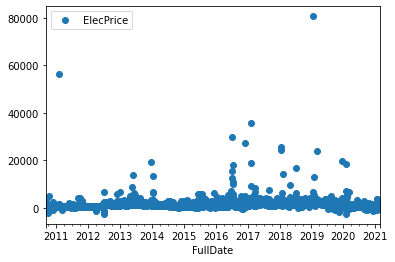

In [49]:
data1.plot(x='FullDate', y='ElecPrice', style='o')

In [50]:
data3= data1[['SysLoad','GasPrice']]

In [53]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(data1[['SysLoad']])

(-3.6901589888366457,
 0.004253725504574117,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [54]:
adfuller(data1[['GasPrice']])

(-2.90276669716518,
 0.04502721288462542,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

In [55]:
adfuller(data1[['ElecPrice']])

(-8.269053866873803,
 4.848817773711633e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 69130.36360776308)

##Divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset

In [34]:

data_train = data1[:2757]
data_test = data1[2757:]



In [14]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.1 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639180 sha256=13897f381548b5b1eaf39e511baf40034f50723970c15586ad50f5b7159bec49
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

##Univariate Time Series Forecasting with Facebook Prophet

 Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16

In [100]:
from fbprophet import Prophet
model = Prophet() 
df = data_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df1 = df[['ds','y']]
model.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [101]:
#make a future facing dataset for the next 1077 days to forecast on
future = model.make_future_dataframe(periods = 1077, freq='d')

#Apply the ,odel to the future facing dataframe
forecast = model.predict(future)

In [102]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1444.216196,3254.909608,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1404.694760,3495.611207,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1464.218322,3187.364573,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1890.493178,2935.325432,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-2059.533743,2649.467800,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,3567.126543,497.357455,6598.878952,1951.581871,5203.899704,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
3830,2021-02-25,3567.943112,535.630739,6256.589331,1950.046470,5206.128618,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
3831,2021-02-26,3568.759681,475.535962,6373.087879,1948.511070,5208.357532,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
3832,2021-02-27,3569.576250,-60.886975,6017.636793,1946.975669,5210.586446,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


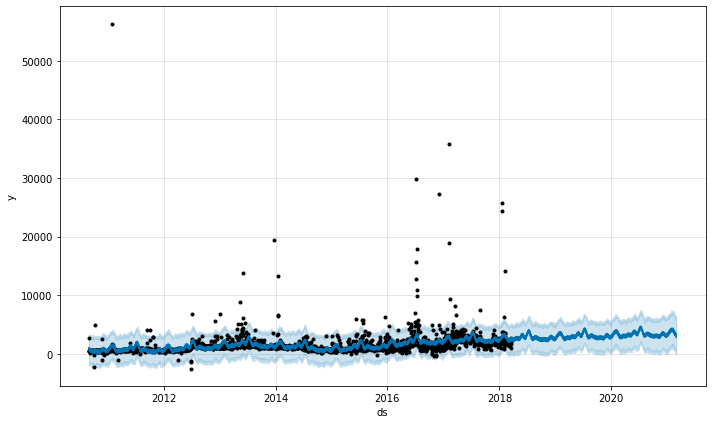

In [103]:
fig1 = model.plot(forecast)

In [104]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          3834 non-null   datetime64[ns]
 1   trend                       3834 non-null   float64       
 2   yhat_lower                  3834 non-null   float64       
 3   yhat_upper                  3834 non-null   float64       
 4   trend_lower                 3834 non-null   float64       
 5   trend_upper                 3834 non-null   float64       
 6   additive_terms              3834 non-null   float64       
 7   additive_terms_lower        3834 non-null   float64       
 8   additive_terms_upper        3834 non-null   float64       
 9   weekly                      3834 non-null   float64       
 10  weekly_lower                3834 non-null   float64       
 11  weekly_upper                3834 non-null   float64     

In [105]:
forecast_sub = forecast[['ds', 'yhat']]
df2 = data_test.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
data_test_sub = df2[['ds', 'y']]
eval = data_test_sub.merge(forecast_sub, on = ['ds'], how = 'left')
eval['abs_error'] = abs(eval['y']-eval['yhat'])
eval['daily_FA'] = 1-(eval['abs_error'] /eval['y'])

total = sum(eval['y'])
total_err = sum(eval['abs_error'])
forecast_acc = 1-(total_err/total)
print(forecast_acc)

0.02497184404844799


In [106]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(eval['y'],eval['yhat'])
mape

5.494751413716547

In [107]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(eval['y'],eval['yhat']))
print(rms)

3218.15577651241


Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:

In [108]:
model1 = Prophet() 
df = data_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
model1.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
#make a future facing dataset for the next 1077 days to forecast on
future = model1.make_future_dataframe(periods = 1077, freq='d')

#Apply the ,odel to the future facing dataframe
forecast1 = model1.predict(future)

In [110]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1327.338735,3226.773504,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1211.356715,3397.325039,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1644.613476,3139.252308,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1809.899626,2742.493376,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-1866.216337,2910.378269,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,3567.126543,471.710534,6272.775880,1968.349604,5184.668419,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
3830,2021-02-25,3567.943112,445.035884,6555.117398,1966.265427,5186.534329,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
3831,2021-02-26,3568.759681,453.170446,6306.863595,1964.181250,5188.400238,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
3832,2021-02-27,3569.576250,-106.146282,5770.604512,1962.097073,5190.266147,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


In [111]:
forecast_sub = forecast1[['ds', 'yhat']]
df2 = data_test.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
data_test_sub = df2[['ds', 'y']]
eval = data_test_sub.merge(forecast_sub, on = ['ds'], how = 'left')
eval['abs_error'] = abs(eval['y']-eval['yhat'])
eval['daily_FA'] = 1-(eval['abs_error'] /eval['y'])

total = sum(eval['y'])
total_err = sum(eval['abs_error'])
forecast_acc = 1-(total_err/total)
print(forecast_acc)

0.02497184404844799


In [112]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(eval['y'],eval['yhat']))
print(rms)

3218.15577651241


In [98]:
 from sklearn.metrics import mean_absolute_percentage_error
 mape = mean_absolute_percentage_error(eval['y'],eval['yhat'])

In [113]:
mape

5.494751413716547

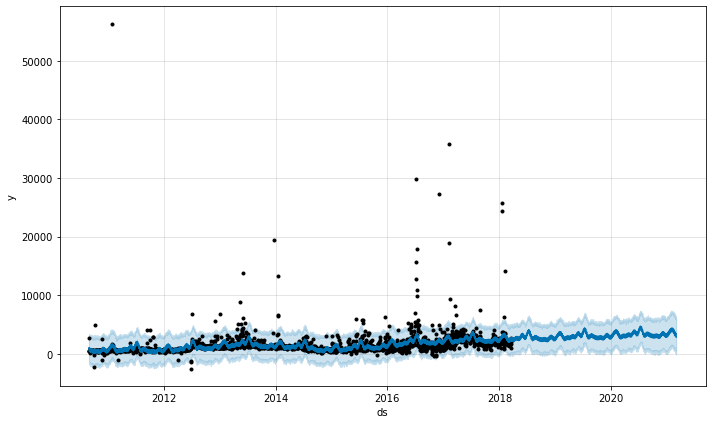

In [114]:
fig1 = model.plot(forecast1)